In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os
from tqdm.auto import tqdm

In [2]:
def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    dfs=[]
    for filename in tqdm(filenames):
        df=pd.read_csv(filename)
        dfs.append(df)
        # print(filename)
    df=pd.concat(dfs)
    df['magnetizationXY']=(df['magnetizationX']**2+df['magnetizationY']**2)**.5
    df['magnetizationXYZ']=(df['magnetizationX']**2+df['magnetizationY']**2+df['magnetizationZ']**2)**.5
    return df

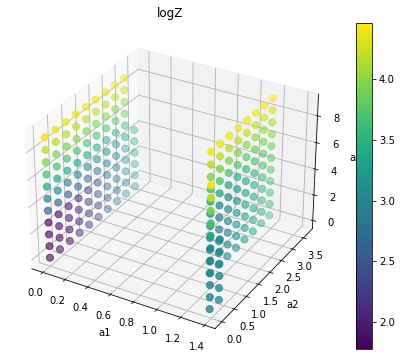

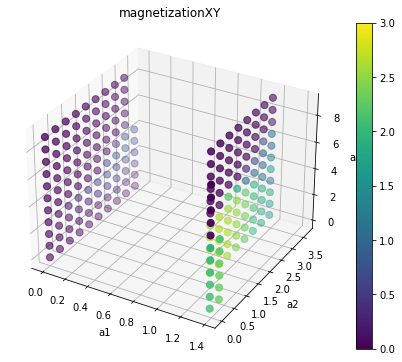

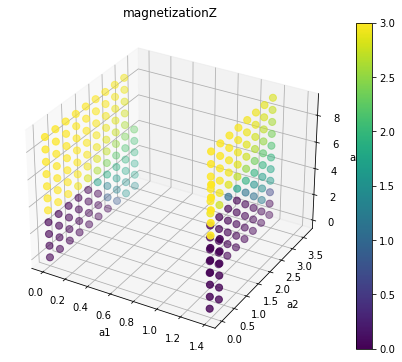

In [5]:
# %matplotlib widget
%matplotlib inline

# df_all=load_df(glob('./data/aklt3d_X10_scan_a*/*/observables.csv'))
df_all=load_df(glob('./data/aklt3d_X10_scan_grid/*/observables.csv'))
df=df_all[df_all['iLayer']==60]

def grid_plot(df,obs_name,clim=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    p=ax.scatter(df['a1'],df['a2'],df['a3'],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel('a1')
    ax.set_ylabel('a2')
    ax.set_zlabel('a3')
    ax.set_title(obs_name)
    fig.colorbar(p)
    plt.show()

grid_plot(df,'logZ')
grid_plot(df,'magnetizationXY',clim=(0,3))
grid_plot(df,'magnetizationZ',clim=(0,3))